### Deliverable 1: Preprocessing the Data for a Neural Network

In [29]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import hvplot.pandas


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


IS_SUCCESSFUL is the target

In [30]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN'],axis=1, inplace=True)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [31]:
application_df.describe().transpose()[['mean', 'std']]

,mean,std
STATUS,9.998542e-01,1.207310e-02
ASK_AMT,2.769199e+06,8.713045e+07
IS_SUCCESSFUL,5.324062e-01,4.989560e-01


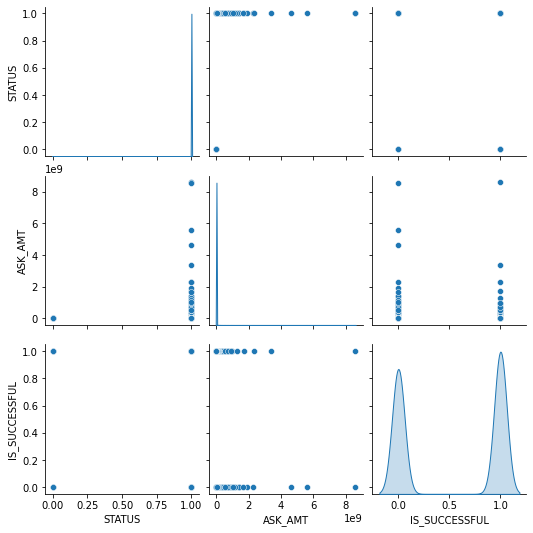

In [32]:
# Create a pairplot to visualize the relationship between features
sns.pairplot(application_df[['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL']], diag_kind='kde')

In [33]:
# To see the datatypes
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [34]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [35]:
# Looking for noisy variables.
# Ask amount tells us a lot. Especially around T3
application_df.hvplot.scatter(x="APPLICATION_TYPE", y="ASK_AMT", by="IS_SUCCESSFUL")
# application_df.drop(['ASK_AMT'], axis=1, inplace=True)

:NdOverlay   [IS_SUCCESSFUL]
   :Scatter   [APPLICATION_TYPE]   (ASK_AMT)

In [36]:
# Looking for noisy variables.
# Affilitaion seems noisy and visually doesn't tell me a lot. Canddate to drop.
application_df.hvplot.scatter(x="APPLICATION_TYPE", y="AFFILIATION", by="IS_SUCCESSFUL")
#application_df.drop(['AFFILIATION'], axis=1, inplace=True)

:NdOverlay   [IS_SUCCESSFUL]
   :Scatter   [APPLICATION_TYPE]   (AFFILIATION)

In [37]:
# Looking for noisy variables.
# USE_CASE tells us good information but with only 2 non-successful maybe it doesn't contribute much to the model.
application_df.hvplot.scatter(x="APPLICATION_TYPE", y="USE_CASE", by="IS_SUCCESSFUL")
#application_df.drop(['USE_CASE'], axis=1, inplace=True)

:NdOverlay   [IS_SUCCESSFUL]
   :Scatter   [APPLICATION_TYPE]   (USE_CASE)

In [38]:
# Looking for noisy variables.
# Organization tells us good information but with only 2 non-successful maybe it doesn't contribute much to the model.
application_df.hvplot.scatter(x="APPLICATION_TYPE", y="ORGANIZATION", by="IS_SUCCESSFUL")
#application_df.drop(['ORGANIZATION'], axis=1, inplace=True)

:NdOverlay   [IS_SUCCESSFUL]
   :Scatter   [APPLICATION_TYPE]   (ORGANIZATION)

In [39]:
# Looking for noisy variables.
# INCOME_AMT tells us good information.
application_df.hvplot.scatter(x="APPLICATION_TYPE", y="INCOME_AMT", by="IS_SUCCESSFUL")
#application_df.drop(['INCOME_AMT'], axis=1, inplace=True)

:NdOverlay   [IS_SUCCESSFUL]
   :Scatter   [APPLICATION_TYPE]   (INCOME_AMT)

In [40]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

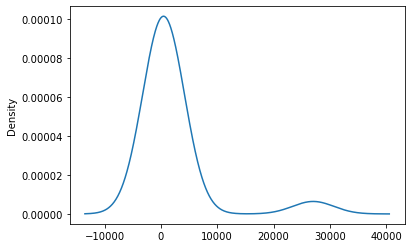

In [41]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [42]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [43]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C2500        1
C1732        1
C4120        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

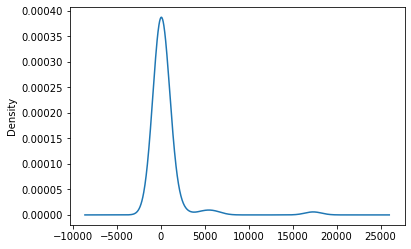

In [44]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [45]:
# Determine which values to replace if counts are less than 1800?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [46]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
#application_cat.remove('IS_SUCCESSFUL')
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [47]:
# Look at NAME value counts for binning
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                         1260
TOPS CLUB INC                                                   765
UNITED STATES BOWLING CONGRESS INC                              700
WASHINGTON STATE UNIVERSITY                                     492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                 408
                                                               ... 
IMPROVED BENEVOLENT & PROTECTIVE ORDER OF ELKS OF THE WORLD       1
YOUTH AMATEUR HOCKEY ASSOCIATION OF SOUTHERN COLORADO INC         1
LEFT TO TELL CHARITABLE FUND                                      1
GARFIELD COUNTY ANIMAL WELFARE FOUNDATION INC                     1
PAY IT FORWARD OUTREACH CORP                                      1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

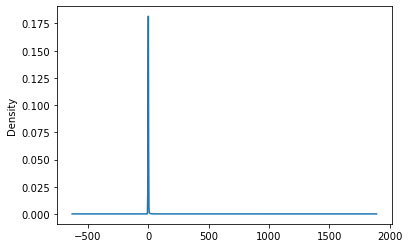

In [48]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [49]:
# Determine which values to replace if counts are less than 4
replace_class = list(name_counts[name_counts < 4].index)

# Replace in dataframe
for cls in replace_class:
    application_df.NAME = application_df.NAME.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                19515
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
INTERNATIONAL ASSOCIATION OF ASSESSING OFFICERS                          4
PARENTS FAMILIES AND FRIENDS OF LESBIANS AND GAYS INC                    4
TEXAS STATE BRANCH 948 NATIONAL ASSOCIATION OF POSTAL SUPERVISORS        4
TEXAS EXTENSION EDUCATION ASSOCIATION                                    4
LIFE STEPS FOUNDATION INC                                                4
Name: NAME, Length: 475, dtype: int64

In [50]:
# dropping STATUS
application_df.drop(['STATUS'],axis=1, inplace=True)

In [51]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALASKA PTA,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL",],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [54]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [55]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features * 2
hidden_nodes_layer2 = number_input_features
hidden_nodes_layer3 = number_input_features /2
hidden_nodes_layer4 = hidden_nodes_layer3 /2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))
    
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1034)              535612    
_________________________________________________________________
dense_1 (Dense)              (None, 517)               535095    
_________________________________________________________________
dense_2 (Dense)              (None, 258)               133644    
_________________________________________________________________
dense_3 (Dense)              (None, 129)               33411     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 130       
Total params: 1,237,892
Trainable params: 1,237,892
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [57]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [58]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5) # save_freq=1000,

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4795 - accuracy: 0.7665
Epoch 2/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4335 - accuracy: 0.7945
Epoch 3/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4271 - accuracy: 0.7966
Epoch 4/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4242 - accuracy: 0.7973
Epoch 5/100
801/804 [============================>.] - ETA: 0s - loss: 0.4227 - accuracy: 0.7986
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.4228 - accuracy: 0.7984
Epoch 6/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4227 - accuracy: 0.7974
Epoch 7/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4213 - accuracy: 0.7968
Epoch 8/100
804/804 [==============================] - 6s 7ms/step - loss: 0.4198 - accuracy: 0.7975
Epoch 9/100
804/804 [=============================

In [59]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4609 - accuracy: 0.7936
Loss: 0.46092909574508667, Accuracy: 0.793586015701294


In [60]:
nn.save("AlphabetSoupCharity_Optimization.h5")

In [61]:
# Trying a logistics regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.467


In [62]:

# Trying a random forest classifier model
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.779


In [ ]:
#Trying SVM
# Does not complete since addition of NAME
#from sklearn.svm import SVC
#from sklearn.gaussian_process.kernels import RBF
# Create the SVM model
#svm = SVC(kernel='linear')

# Train the model
#svm.fit(X_train_scaled, y_train)

# Evaluate the model
#y_pred = svm.predict(X_test_scaled)
#print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")


In [ ]:
# Tryin SVM with non-linear kernel
# Does not complete since addition of NAME
#from sklearn.svm import SVC
#from sklearn.gaussian_process.kernels import RBF
# Create the SVM model
#from sklearn.gaussian_process.kernels import RBF
#kcpa = SVC(kernel='rbf', probability=True)

#kcpa.fit(X_train_scaled, y_train)

# Evaluate the model
#y_pred = kcpa.predict(X_test_scaled)
#print(f" RBF model accuracy: {accuracy_score(y_test,y_pred):.3f}")